
# OMDENA - LOS ANGELES CHAPTER
# LA OPEN DATA CHALLENGE
# LA TRAFFIC COLLISION DATA (2010 - today: Feb 2023)


## 0. Outline
1. Overview : 
1.1. The Challenge
1.2. Project overview
2. Initialization & Data description : 
2.1. Init
2.2. Processing
2.2.1. Data types
2.2.2. Missing values
2.2.3. Target data
3. Data visualization : 
3.1. Yearly Collision number
3.2. Yearly Collision number : per month
3.3. Yearly collision per weekday
4. Data visualization with a map : 
4.1. Data preparation
4.2. Data viz
4.2.1. Init
4.2.2. Collision by LAPD Basic car division
4.2.3. Choropleth of 2022 -Collision by LAPD Division

## 1. Overview
### 1.1. The Challenge
- URL : https://omdena.com/projects/analyzing-open-data-about-los-angeles-metropolitan-area/
- Github: https://github.com/OmdenaAI/la-usa-chapter-open-data
- GSheets: https://docs.google.com/spreadsheets/d/1iagwjFifZ7Q0eKiVTPUBJs1UmeUrX1Z68Xp8Xlyvxr8/edit#gid=0
- Period: Feb - Mar 2023

### 1.2. Project overview
- Traffic Collision data (2010 - today)
- Data #62 within the gsheet [tab : DATA SRC]https://catalog.data.gov/dataset/traffic-collision-data-from-2010-to-present
- Resources (also available in the /data folder):
    * Download the data : https://data.lacity.org/api/views/d5tf-ez2w/rows.json?accessType=DOWNLOAD
    - The real source of the data : https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w
    * details : metadata, column details
- Modus Operandi Codes (MO Codes): https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf


## 2. Initialization & Data description

### 2.1. Init

In [1]:
import pandas as pd;
import numpy as np;

The data size 111+ MB, then it is better to download it manually then update the path

traffic_collision_data = pd.read_csv('https://data.lacity.org/api/views/d5tf-ez2w/rows.json?accessType=DOWNLOAD', index_col='DR Number')

In [7]:
traffic_collision_data = pd.read_csv('./../data/Traffic_Collision_Data_from_2010_to_Present.csv', index_col='DR Number');
pd.set_option('display.max_rows', 40);
traffic_collision_data.shape

(587905, 17)

In [9]:
traffic_collision_data.head()

,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
DR Number,,,,,,,,,,,,,,,,,
190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [10]:
traffic_collision_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 190319651 to 230706088
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date Reported           587905 non-null  object 
 1   Date Occurred           587905 non-null  object 
 2   Time Occurred           587905 non-null  int64  
 3   Area ID                 587905 non-null  int64  
 4   Area Name               587905 non-null  object 
 5   Reporting District      587905 non-null  int64  
 6   Crime Code              587905 non-null  int64  
 7   Crime Code Description  587905 non-null  object 
 8   MO Codes                500799 non-null  object 
 9   Victim Age              503009 non-null  float64
 10  Victim Sex              578395 non-null  object 
 11  Victim Descent          577486 non-null  object 
 12  Premise Code            586946 non-null  float64
 13  Premise Description     586945 non-null  object 
 14  Address  

### 2.2. Processing
#### 2.2.1. Data types

In [11]:
traffic_collision_data['Date Reported'] = pd.to_datetime(traffic_collision_data['Date Reported'], format='%m/%d/%Y')
traffic_collision_data['Date Occurred'] = pd.to_datetime(traffic_collision_data['Date Occurred'], format='%m/%d/%Y')
traffic_collision_data.sort_values(by=['Date Occurred'], ascending=True, inplace=True)

#### 2.2.2. Missing value (NaN, None, Null, ' ', ...)

In [12]:
traffic_collision_data.isna().sum()

Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87106
Victim Age                84896
Victim Sex                 9510
Victim Descent            10419
Premise Code                959
Premise Description         960
Address                       0
Cross Street              27914
Location                      0
dtype: int64

However, this analysis focus mainly of collision data number, time and location. Then these missing value do not affect the processing

#### 2.2.3. Target data

In [13]:
target_df = traffic_collision_data.loc[:,['Date Occurred', 'Time Occurred', 'Area ID',
       'Area Name', 'Reporting District', 'Location']]

In [14]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 100604023 to 231806486
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date Occurred       587905 non-null  datetime64[ns]
 1   Time Occurred       587905 non-null  int64         
 2   Area ID             587905 non-null  int64         
 3   Area Name           587905 non-null  object        
 4   Reporting District  587905 non-null  int64         
 5   Location            587905 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 31.4+ MB


In [15]:
target_df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Location
DR Number,,,,,,
100604023,2010-01-01,210,6,Hollywood,632,"(34.0981, -118.3628)"
100604024,2010-01-01,305,6,Hollywood,666,"(34.098, -118.3287)"
110626546,2010-01-01,1155,6,Hollywood,666,"(34.098, -118.3267)"
101304290,2010-01-01,325,13,Newton,1373,"(33.9916, -118.2628)"
101204064,2010-01-01,2115,12,77th Street,1268,"(33.9616, -118.2739)"


## 3. Data vizualisation

In [16]:
from matplotlib import pyplot as plt

In [17]:
%matplotlib inline

### 3.1. Yearly collision number

<Axes: xlabel='Date Occurred'>

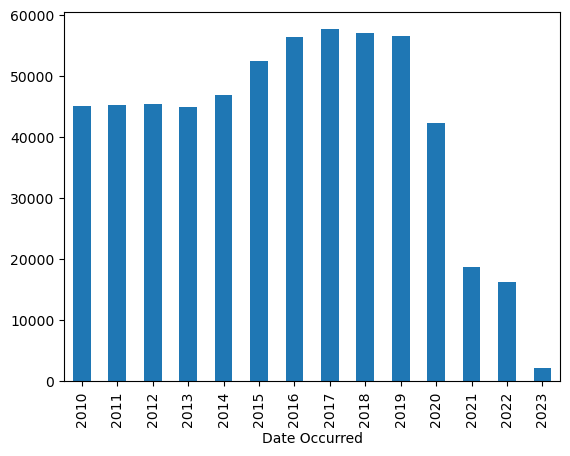

In [18]:
target_df.groupby(target_df['Date Occurred'].dt.year)['Date Occurred'].count().plot(kind='bar')

We see that 2023 numbers are anormally low. May be not-equitably distributed per month ?

In [19]:
target_df['year'] = target_df['Date Occurred'].dt.year
target_df['month'] = target_df['Date Occurred'].dt.month
#target_df
# target_df.groupby(['year'])['month'].nunique()
target_df.groupby(['year']).agg(occurence=('month', 'nunique'))

,occurence
year,
2010,12
2011,12
2012,12
2013,12
2014,12
2015,12
2016,12
2017,12
2018,12


So this table reinforce the initial insight (from the bar chart) : 2023 data is imcomplete : only 2 months (January and February) > let's remove it

In [20]:
target_df = target_df[target_df['year'] <= 2022]
target_df.tail()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Location,year,month
DR Number,,,,,,,,
230904001,2022-12-31,2225,9,Van Nuys,964,"(34.1612, -118.4315)",2022,12
230304014,2022-12-31,2130,3,Southwest,359,"(34.014, -118.2828)",2022,12
221018266,2022-12-31,700,10,West Valley,1088,"(34.1576, -118.5036)",2022,12
220620786,2022-12-31,100,6,Hollywood,666,"(34.0907, -118.3325)",2022,12
221822970,2022-12-31,1900,18,Southeast,1821,"(33.9501, -118.2827)",2022,12


In [21]:
target_df.shape

(585810, 8)

New plot from collision through 2010-2022

Text(0, 0.5, 'Number')

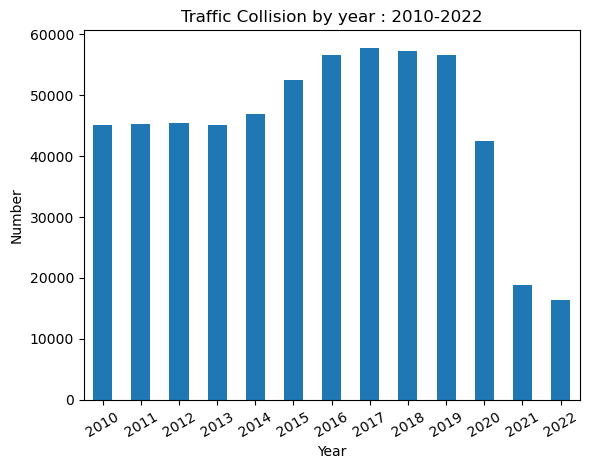

In [23]:
collision_by_year_plot = target_df.groupby(target_df['Date Occurred'].dt.year)['Date Occurred'] \
    .count() \
    .plot(kind='bar', title='Traffic Collision by year : 2010-2022', rot=30)
collision_by_year_plot.set_xlabel('Year')
collision_by_year_plot.set_ylabel('Number')


### 3.2. Yearly collision number : per month

<Axes: title={'center': 'Traffic Collision by year / month'}, xlabel='Date Occurred'>

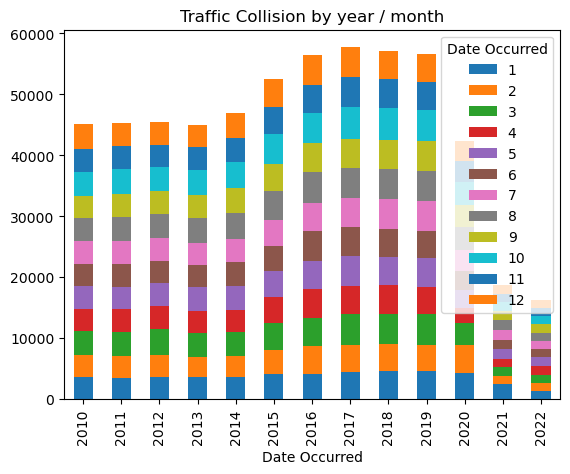

In [26]:
target_df.groupby([target_df['Date Occurred'].dt.year, target_df['Date Occurred'].dt.month])['Date Occurred'] \
    .count().unstack().plot(kind='bar', stacked=True,
    title='Traffic Collision by year / month',)

Text(0, 0.5, 'Number')

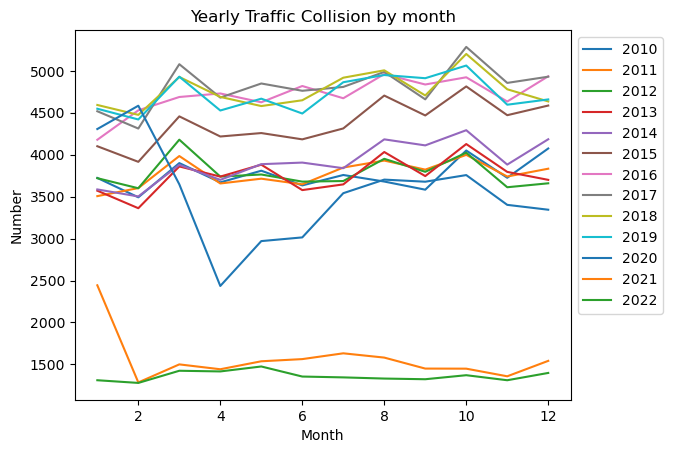

In [27]:
collision_by_month_year_plot = target_df.groupby([target_df['Date Occurred'].dt.month, target_df['Date Occurred'].dt.year])['Date Occurred'] \
    .count().unstack() \
    .plot(title='Yearly Traffic Collision by month')
collision_by_month_year_plot.legend(bbox_to_anchor=(1, 1.0))

collision_by_month_year_plot.set_xlabel('Month')
collision_by_month_year_plot.set_ylabel('Number')

Quite visible pattern ? 
- Decrease on Feb, Sept and Nov
- Increase in March and Aug
- COVID-19 lockdown seems changed the pattern (2021, 2022)

### 3.3 Yearly collision per weekday

Text(0, 0.5, 'Number')

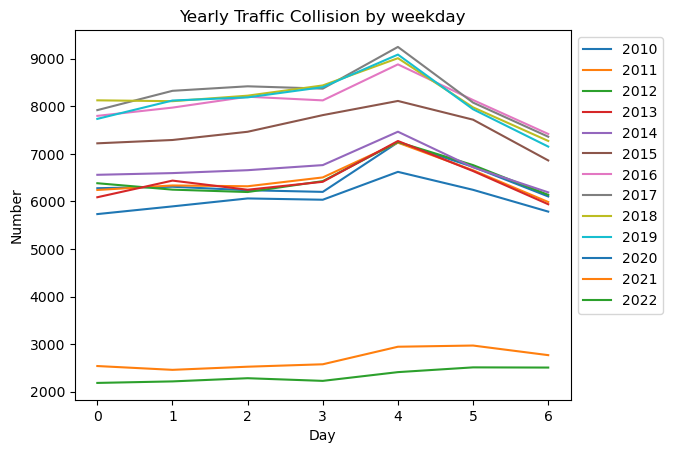

In [28]:
collision_by_weekday_year_plot = target_df.groupby([target_df['Date Occurred'].dt.weekday, target_df['Date Occurred'].dt.year])['Date Occurred'] \
    .count().unstack() \
    .plot(title='Yearly Traffic Collision by weekday')
collision_by_weekday_year_plot.legend(bbox_to_anchor=(1, 1.0))

collision_by_weekday_year_plot.set_xlabel('Day')
collision_by_weekday_year_plot.set_ylabel('Number')

Observation:
- Highest collision number on Friday
- Lowest collision number on Sunday

## 4. Data visualisation with a map
Tuto : 
- https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b
- https://www.freecodecamp.org/news/real-world-data-science-project-traffic-accident-analysis-e5a36775ee11
- https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73

### 4.1. Data preparation

In [29]:
#separate Lat and Long
# Expand=true is used to "explode" the resulting splited string
# we need to remove all space before the longitude value
target_df[['Latitude','Longitude']] = target_df.Location.str.strip('\(|\)|').str.replace(" ","").str.strip().str.split(',', expand = True)
target_df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Location,year,month,Latitude,Longitude
DR Number,,,,,,,,,,
100604023,2010-01-01,210,6,Hollywood,632,"(34.0981, -118.3628)",2010,1,34.0981,-118.3628
100604024,2010-01-01,305,6,Hollywood,666,"(34.098, -118.3287)",2010,1,34.098,-118.3287
110626546,2010-01-01,1155,6,Hollywood,666,"(34.098, -118.3267)",2010,1,34.098,-118.3267
101304290,2010-01-01,325,13,Newton,1373,"(33.9916, -118.2628)",2010,1,33.9916,-118.2628
101204064,2010-01-01,2115,12,77th Street,1268,"(33.9616, -118.2739)",2010,1,33.9616,-118.2739


In [34]:
print(max(target_df['Latitude']), min(target_df['Latitude']))
print(max(target_df['Longitude']), min(target_df['Longitude']))

34.692 0.0
0.0 -117.7059


In [35]:
#Remove 'NULL' location >> (0.0)
location_filter = target_df[(target_df['Longitude'] == "0.0") & (target_df['Latitude'] == "0.0")].index
target_df.drop(location_filter, inplace = True)
location_filter.size

761

In [37]:
target_df.shape

(585049, 10)

Will be too heavy to plot on 1 map, so we'll focus on 2022 data

In [38]:
target_df_2022 = target_df.loc[target_df.year == 2022]
target_df_2022.shape

(16339, 10)

In [39]:
print(max(target_df_2022.Latitude), min(target_df_2022.Latitude))
print(max(target_df_2022.Longitude), min(target_df_2022.Longitude))

34.3372 33.7065
-118.6629 -118.1554


### 4.2. Data visualization
#### 4.2.1. Init

In [36]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

City boundaries shape from: 
https://geohub.lacity.org/datasets/lacounty::city-boundaries-3/about
(Published on 09/16/2016, LAst updated on 1/21/2023)

In [41]:
la_city_boundaries_map = gpd.read_file('./../data/traffic_collision/City_Boundaries/City_Boundaries.shp')
la_city_boundaries_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

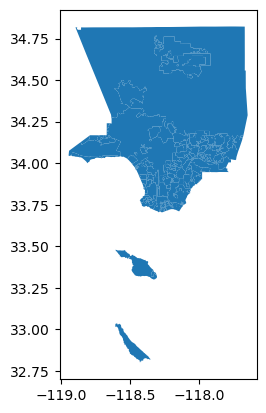

In [42]:
la_city_boundaries_map.plot()

#### 4.2.2. Collision by LAPD Basic car division
- CREDIT : LAPD Basic Car division: (Patty Jula) License CC By 4.0 License
https://geohub.lacity.org/datasets/lahub::lapd-basic-car/explore

In [43]:
lapd_basic_car_map = gpd.read_file('./../data/traffic_collision/LAPD_Basic_Car/BASIC_CAR.shp')
lapd_basic_car_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
lapd_basic_car_map.head()

,OBJECTID,BASICCAR,BUREAU,DIVISION,SHAPE_Leng,SHAPE_Area,geometry
0,1,16A35,VALLEY BUREAU,FTHL,0.421922,-0.003380,"POLYGON ((-118.38291 34.29425, -118.38294 34.2..."
1,2,16A59,VALLEY BUREAU,FTHL,0.367079,-0.003126,"POLYGON ((-118.28670 34.27834, -118.27368 34.2..."
2,3,14A13,WEST BUREAU,PAC,0.059106,-0.000174,"POLYGON ((-118.46233 33.98919, -118.46249 33.9..."
3,4,14A49,WEST BUREAU,PAC,0.162245,-0.000435,"MULTIPOLYGON (((-118.41423 34.00343, -118.4096..."
4,5,LAX,WEST BUREAU,PAC,0.166654,-0.001138,"POLYGON ((-118.43016 33.95587, -118.43033 33.9..."


<Axes: >

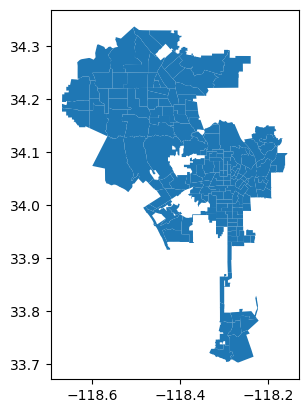

In [46]:
lapd_basic_car_map.plot()

In [49]:
# Add 'geometry' column to our data
crs = {'init':'EPSG:4326'}
target_df_2022_geometry = [Point(xy) for xy in zip(target_df_2022['Longitude'], target_df_2022['Latitude'])]
target_geo_df_2022 = gpd.GeoDataFrame(target_df_2022, 
                          crs = crs, 
                          geometry = target_df_2022_geometry)

/home/andrews/miniconda3/envs/my_w4/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'LA City - Traffic Collision data in 2022')

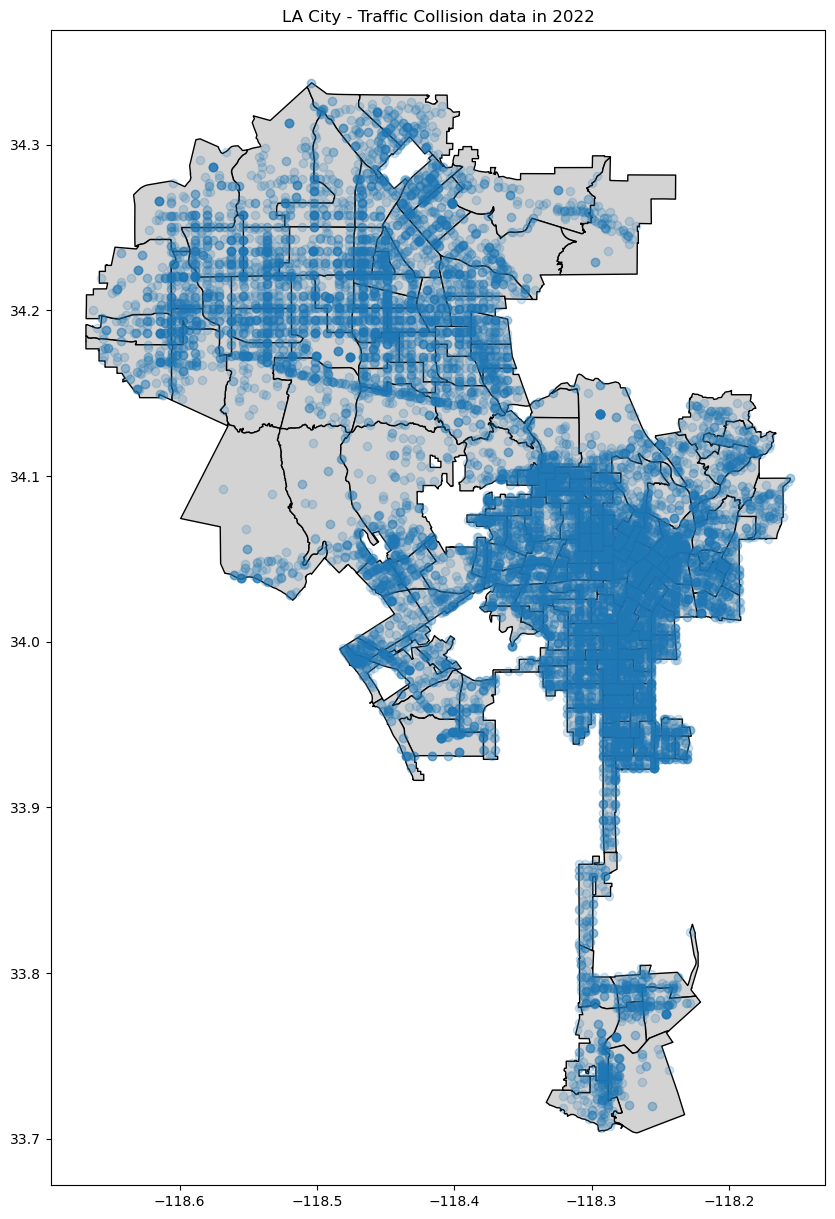

In [62]:
# Set the alpha to increase readability
fig, ax = plt.subplots(figsize = (15,15))
lapd_basic_car_map.plot(ax=ax, color='lightgrey', edgecolor = 'black')
target_geo_df_2022.plot(ax=ax, alpha = .2)
ax.set_title('LA City - Traffic Collision data in 2022')

#### 4.2.3. Choropleth of 2022 -Collision by LAPD Division
- CREDIT : LAPD Basic Car division: (Patty Jula) License CC By 4.0 License
https://geohub.lacity.org/datasets/lahub::lapd-divisions/about

In [55]:
lapd_divisions_map = gpd.read_file('./../data/traffic_collision/LAPD_Divisions/LAPD_Divisions.shp')
lapd_divisions_map

,OBJECTID,APREC,PREC,AREA,PERIMETER,SHAPE_Leng,SHAPE_Area,geometry
0,1,MISSION,19,6.995826e+08,190817.495739,0.576177,0.006363,"POLYGON ((-118.50736 34.33464, -118.50381 34.3..."
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,0.534007,0.012249,"POLYGON ((-118.50736 34.33464, -118.50668 34.3..."
2,3,FOOTHILL,16,1.297385e+09,203717.879169,0.627755,0.011797,"POLYGON ((-118.41581 34.29384, -118.41567 34.2..."
3,4,TOPANGA,21,9.090326e+08,155505.795458,0.470165,0.008260,"POLYGON ((-118.63166 34.23858, -118.63151 34.2..."
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,0.407795,0.008507,"POLYGON ((-118.56229 34.22035, -118.56184 34.2..."
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,0.566582,0.005765,"POLYGON ((-118.34264 34.11645, -118.34270 34.1..."
6,7,VAN NUYS,9,4.896950e+08,116288.308461,0.347249,0.004449,"POLYGON ((-118.47325 34.21651, -118.47313 34.2..."
7,8,NORTHEAST,11,8.156022e+08,178460.722082,0.541347,0.007404,"POLYGON ((-118.32904 34.15022, -118.32902 34.1..."
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,0.353721,0.003375,"POLYGON ((-118.34695 34.11831, -118.34694 34.1..."
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,0.897951,0.016368,"POLYGON ((-118.51758 34.02506, -118.51762 34.0..."


<Axes: >

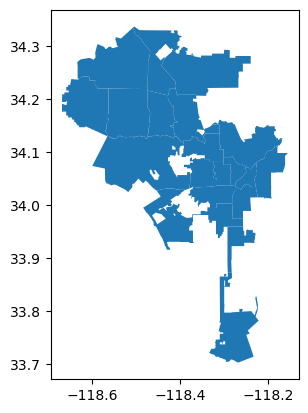

In [56]:
lapd_divisions_map.plot()

Agregate collision data by division

In [57]:
collision_2022_by_division = target_df_2022.groupby(target_df_2022['Area ID'], as_index = False).agg(occ=('Area ID', 'count'))
collision_2022_by_division

,Area ID,occ
0,1,877
1,2,658
2,3,901
3,4,642
4,5,646
5,6,702
6,7,839
7,8,673
8,9,718
9,10,876


In [58]:
localised_collision_2022_by_area = pd.merge(
    left = lapd_divisions_map, 
    right = collision_2022_by_division,
    left_on = "PREC",
    right_on = "Area ID")

localised_collision_2022_by_area

,OBJECTID,APREC,PREC,AREA,PERIMETER,SHAPE_Leng,SHAPE_Area,geometry,Area ID,occ
0,1,MISSION,19,6.995826e+08,190817.495739,0.576177,0.006363,"POLYGON ((-118.50736 34.33464, -118.50381 34.3...",19,735
1,2,DEVONSHIRE,17,1.346816e+09,175591.702871,0.534007,0.012249,"POLYGON ((-118.50736 34.33464, -118.50668 34.3...",17,781
2,3,FOOTHILL,16,1.297385e+09,203717.879169,0.627755,0.011797,"POLYGON ((-118.41581 34.29384, -118.41567 34.2...",16,659
3,4,TOPANGA,21,9.090326e+08,155505.795458,0.470165,0.008260,"POLYGON ((-118.63166 34.23858, -118.63151 34.2...",21,630
4,5,WEST VALLEY,10,9.364057e+08,136316.899694,0.407795,0.008507,"POLYGON ((-118.56229 34.22035, -118.56184 34.2...",10,876
5,6,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,0.566582,0.005765,"POLYGON ((-118.34264 34.11645, -118.34270 34.1...",15,734
6,7,VAN NUYS,9,4.896950e+08,116288.308461,0.347249,0.004449,"POLYGON ((-118.47325 34.21651, -118.47313 34.2...",9,718
7,8,NORTHEAST,11,8.156022e+08,178460.722082,0.541347,0.007404,"POLYGON ((-118.32904 34.15022, -118.32902 34.1...",11,672
8,9,HOLLYWOOD,6,3.718353e+08,115808.747099,0.353721,0.003375,"POLYGON ((-118.34695 34.11831, -118.34694 34.1...",6,702
9,10,WEST LOS ANGELES,8,1.803659e+09,295206.415546,0.897951,0.016368,"POLYGON ((-118.51758 34.02506, -118.51762 34.0...",8,673


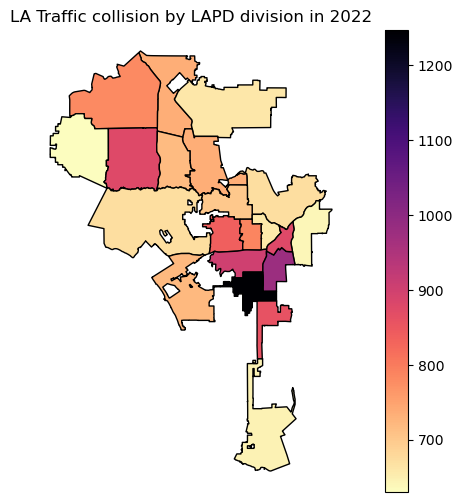

In [59]:
fig, ax = plt.subplots(figsize = (10,6)) 
localised_collision_2022_by_area.plot(ax = ax, color='lightgrey');
localised_collision_2022_by_area.plot(
    ax = ax, legend=True, edgecolor = 'black',
    column='occ', cmap='magma_r', k=7)
# localised_collision_2022_by_area.plot(ax = ax, column='occ', cmap='viridis', k=7, legend=True, edgecolor = 'black')
plt.title("LA Traffic collision by LAPD division in 2022");
ax.set_axis_off();